# Modelo de Machine Learning com Python

In [2]:
import sklearn as sl
from pandas import DataFrame

Dataset: Pima Indians Diabetes Data Set https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

Este dataset descreve os registros médicos entre pacientes do Pima Inidians e cada registro está marcado se o paciente desenvolveu ou não diabetes.

Informações sobre os atributos:<br>
1 Number of times pregnant<br>
2 Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>
3 Diastolic blood pressure (mm Hg)<br>
4 Triceps skin fold thickness (mm)<br>
5 2-Hour serum insulin (mu U/ml)<br>
6 Body mass index (weight in kg/(height in m)^2)<br>
7 Diabetes pedigree function<br>
8 Age (years)<br>
9 Class variable (0 or 1)

In [3]:
# Carregando os dados com numpy
import numpy as np
arquivo = 'data\\pima-data.csv'
arquivo_data = open(arquivo, 'rb')
dados = np.loadtxt(arquivo_data, delimiter = ',')
print(dados.shape)

(768, 9)


In [4]:
# Carregando os dados com o Pandas
from pandas import read_csv
arquivo = 'data\\pima-data.csv'
dados = read_csv(arquivo, names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
print(dados.shape)

(768, 9)


In [5]:
# Metodo recomendado
# Carregando CSV da internet
from pandas import read_csv
arquivo = 'http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv'
dados = read_csv(arquivo, names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
print(dados.shape)

(768, 9)


# Análise exploratória dos dados
## Estatística descritiva

In [6]:
# Visualização inicial dos dados
# Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.
# Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.
# A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto maior de dados e depois aplique o modelo no Big Data.
dados.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
# Visualizando as dimensões
dados.shape

(768, 9)

In [8]:
# Visualizando os atributos
# O tipo dos dados é muito importante. Pode ser necessário converter strings ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários.
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [9]:
# Exibindo sumário dos dados
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#### Verificando balanceamento dos dados
# Em problemas de classificação pode ser necessário balancear as classes. 
# Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento. 
# Podemos ver abaixo que existe uma clara desproporção entre as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes).
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

In [11]:
# Verificando correlação dos dados
# A correlação é o relacionamento entre 2 variáveis. 
# O métodos mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. 
# Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. 
# Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

# Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houverem atributos altamente correlacionados (colineares).

dados.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
# Verificando distribuição dos dados
# Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). 
# Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. 
# Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

## Visualização com o Matplotlib

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

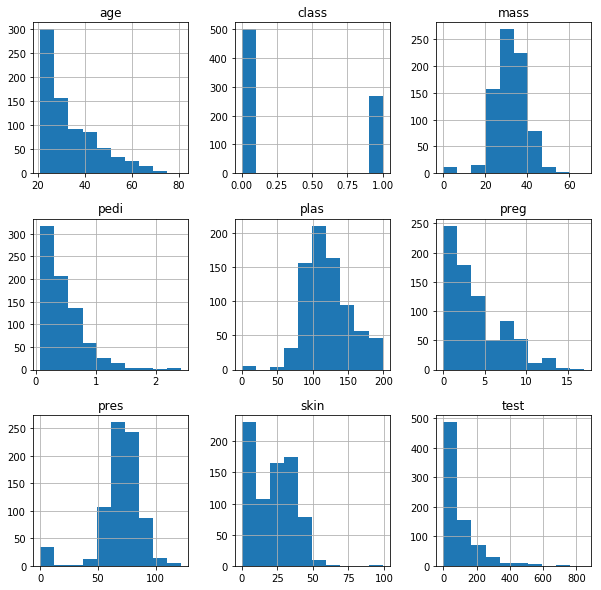

In [29]:
# Com o histograma podemos rapidamente avaliar a distribuição de cada atributo. 
# Os histograma agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. 
# Com o histograma, você pode rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não. Isso também vai ajudar na identificação dos outliers.

# Podemos ver que os atributos age, pedi e test possuem uma distribuição exponencial. Podemos ver que as colunas mass e press possuem uma distribuição normal.

dados.hist()
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

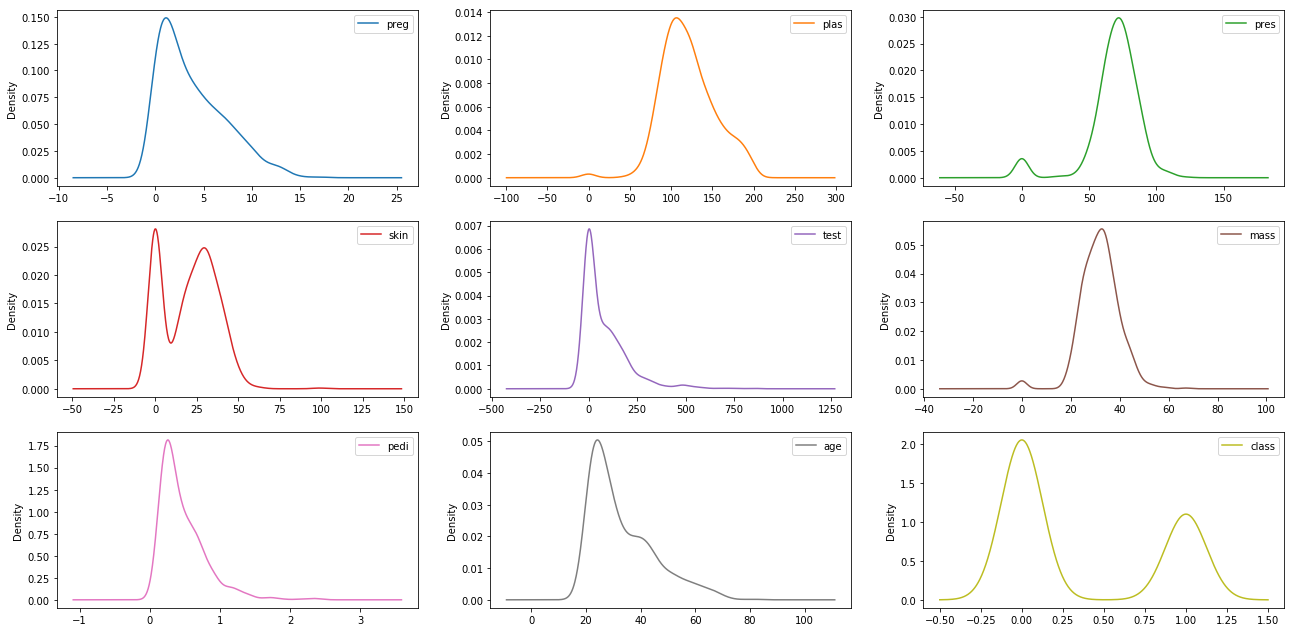

In [15]:
# Com o density plot
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

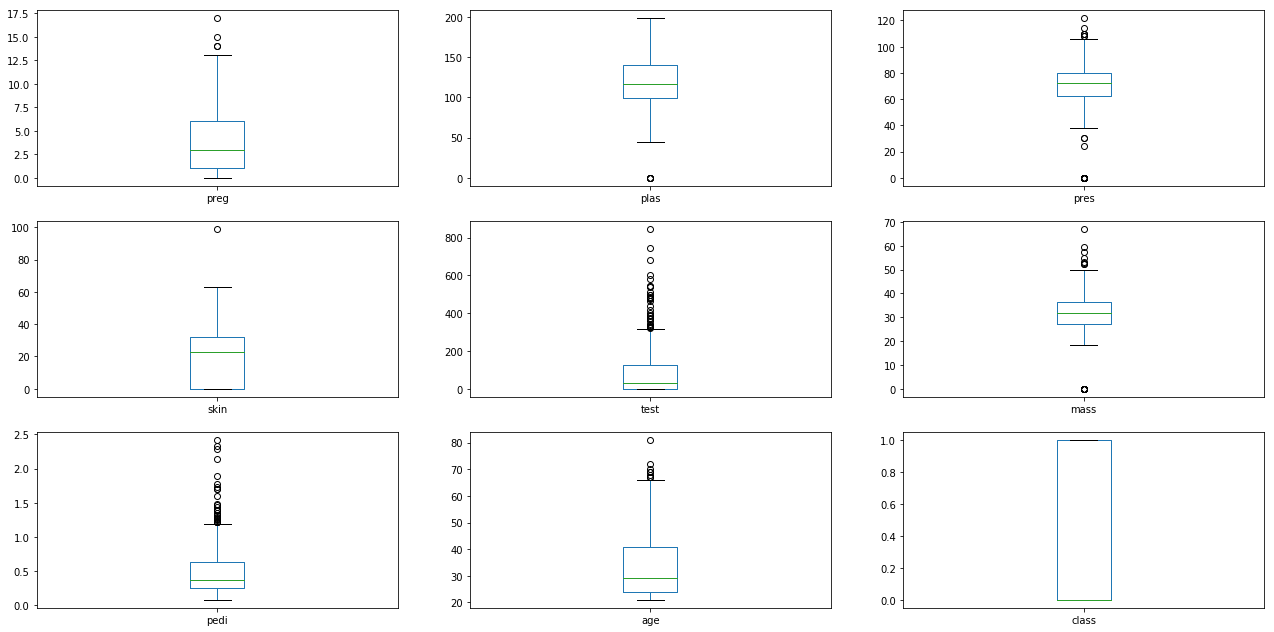

In [16]:
# Com os boxplots também podemos revisar a distribuição dos dados para cada atributo. 
# A linha no centro (vermelho) é o valor da mediana (quartil 50%), a linha abaixo é o quartil 25% e a linha acima o quartil 75%. 
# O boxplot ajuda a ter uma ideia da dispersão dos dados e os possíveis outliers.
# Podemos ver que a dispersão dos dados é bem diferente entre os atributos:
# As colunas age, skin e test possuem uma simetria muito próxima a valores de dados menores.

dados.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

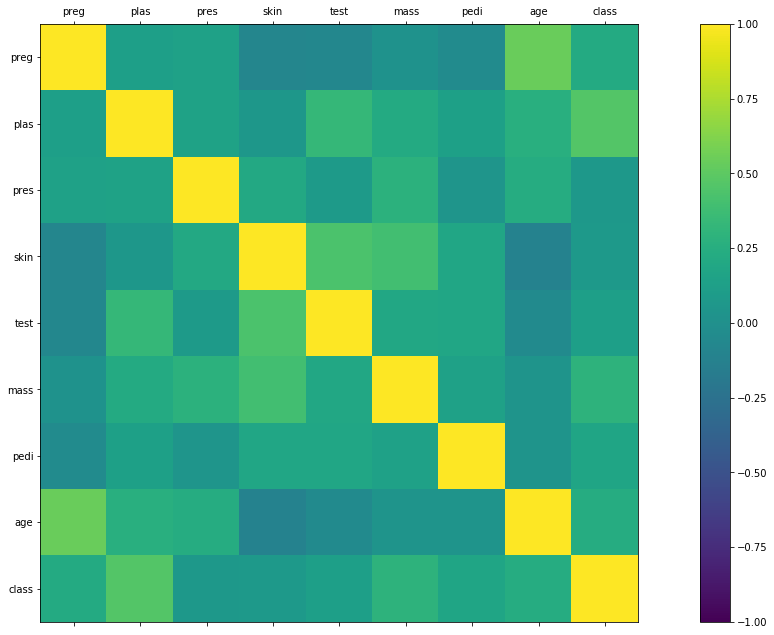

In [17]:
# Matriz de correlação
correlations = dados.corr()

fig = plt.figure()
ax = fig.add_subplot(111) # Define tamanho do plot
cax = ax.matshow(correlations, vmin = -1, vmax = 1) #adiciona os dados ao plot e define valor maximo e minimo
fig.colorbar(cax) # adiciona a barra lateral ao plot

ticks = np.arange(0 , 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(dados.columns)
ax.set_yticklabels(dados.columns)

plt.show()

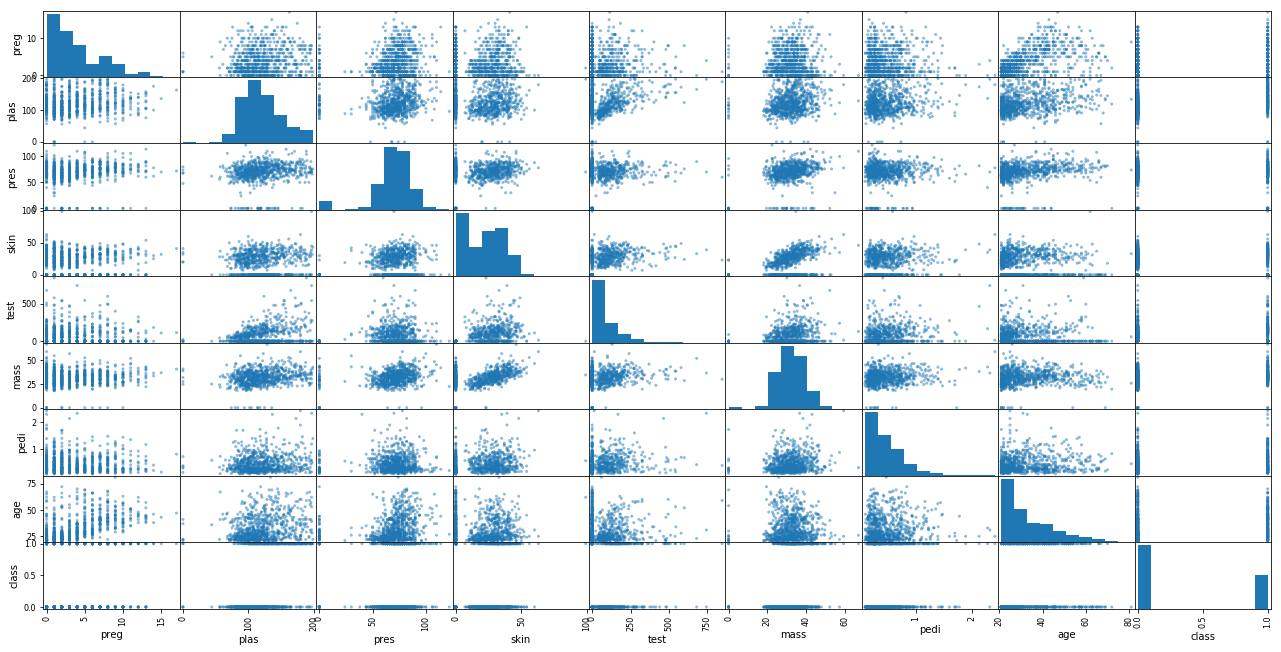

In [18]:
# Scatterplot
# Um scatterplot mostra o relacionamento entre duas variáveis como pontos em duas dimensões, sendo um eixo para cada variável. P
# Podemos criar um scatterplot para cada par de variáveis em nosso dataset. 
# A exemplos da matriz de correlação, o scatterplot matrix é simétrico

from pandas.plotting import scatter_matrix
#scatter_matrix(dados.loc[:,['class','plas']])
scatter_matrix(dados)
plt.show()

## Visualização com Seaborn

In [19]:
import seaborn as sns

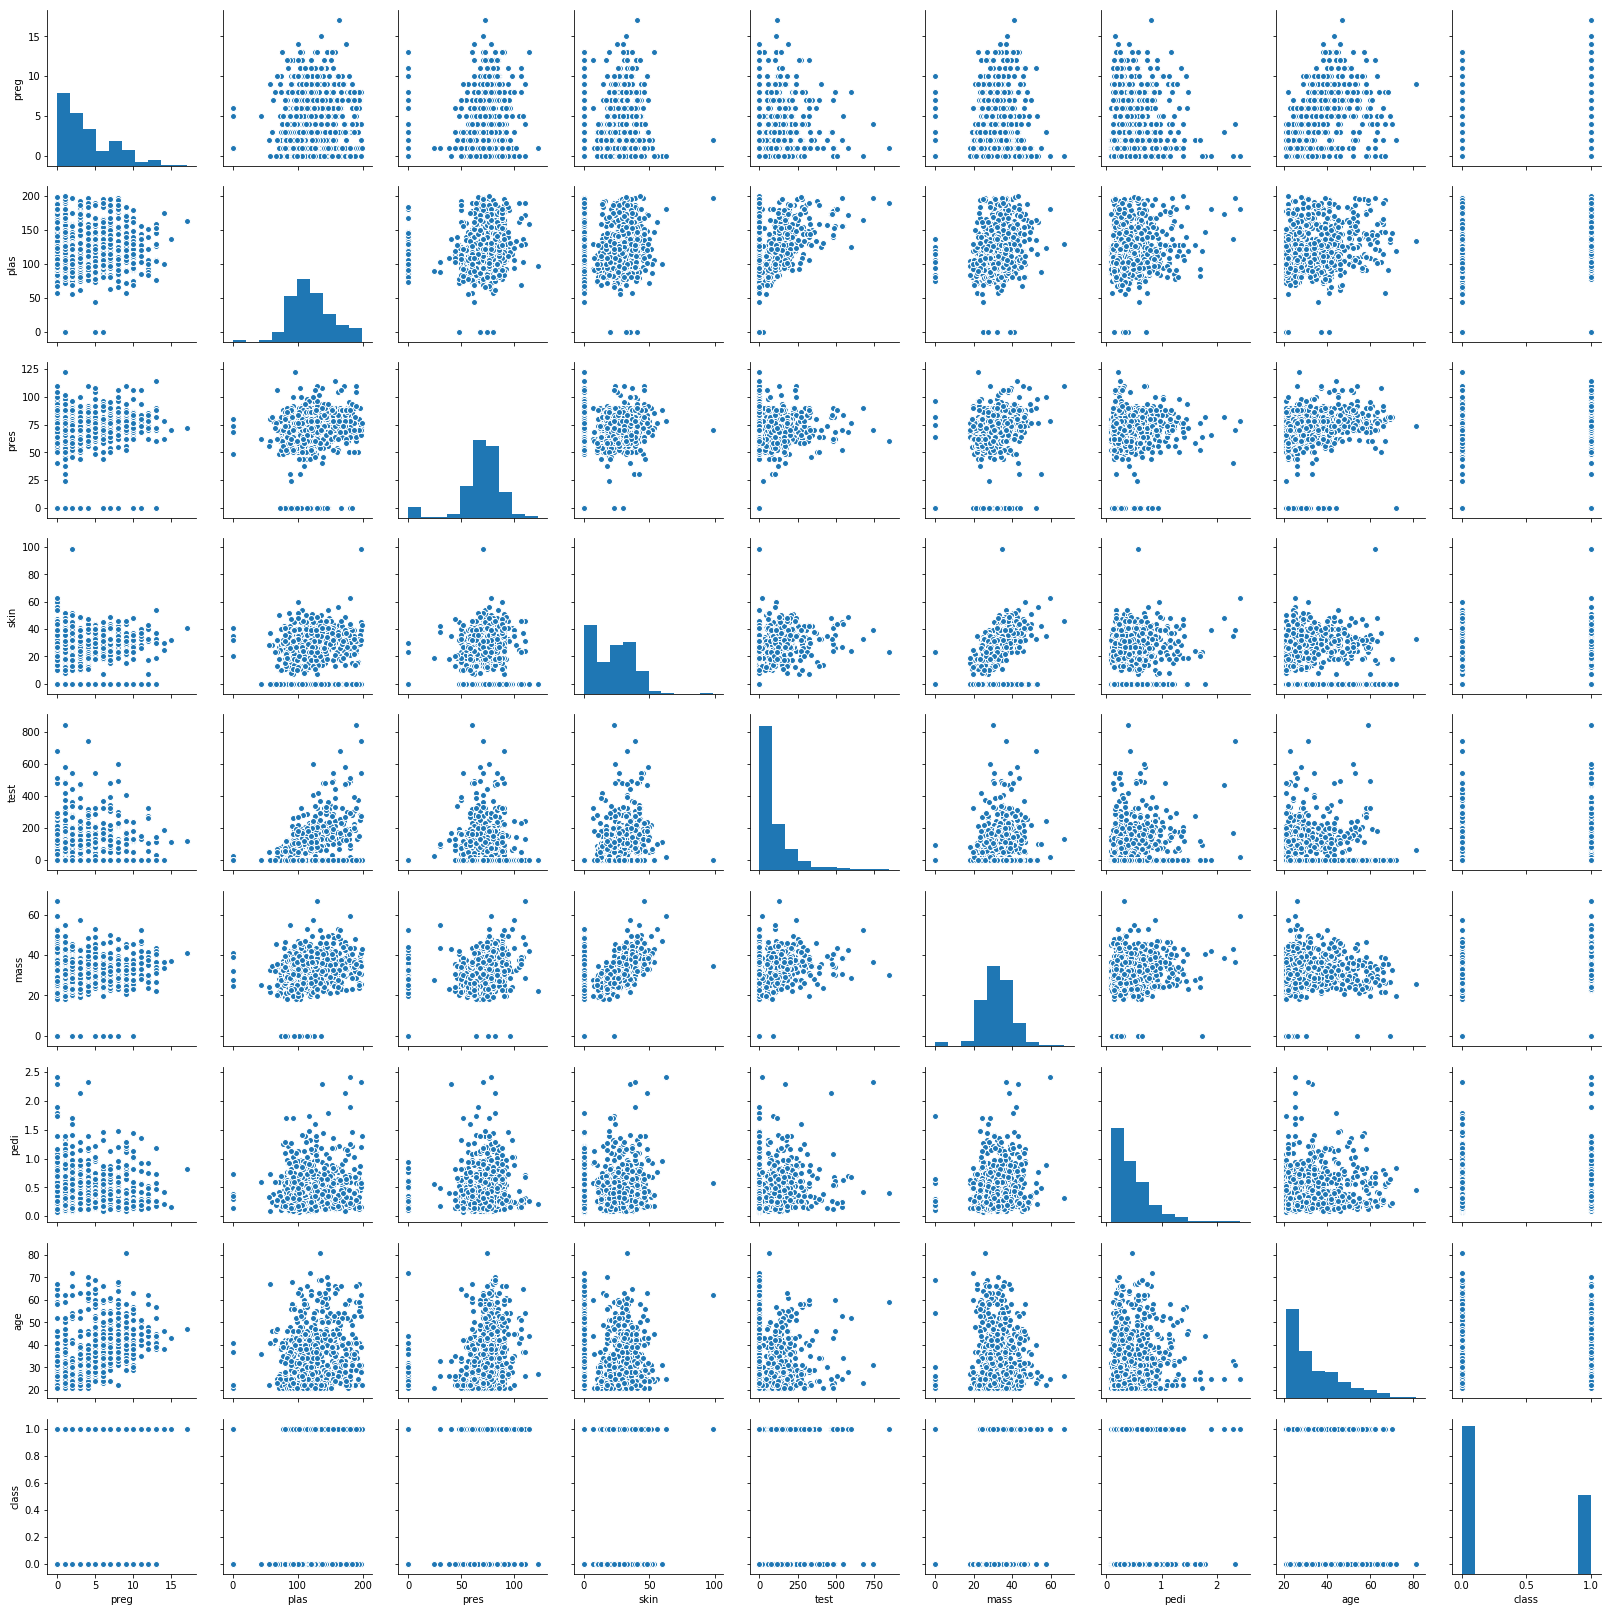

In [20]:
# Pairplot
sns.pairplot(dados)

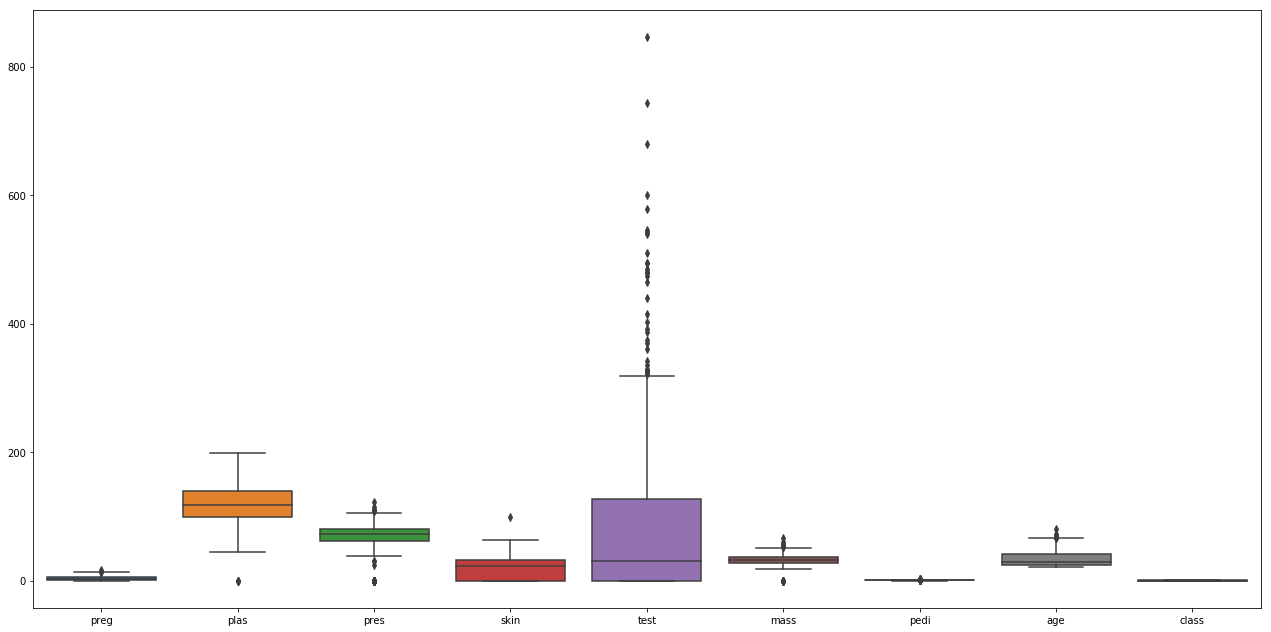

In [21]:
#Boxplot
sns.boxplot(data = dados, orient ='v')

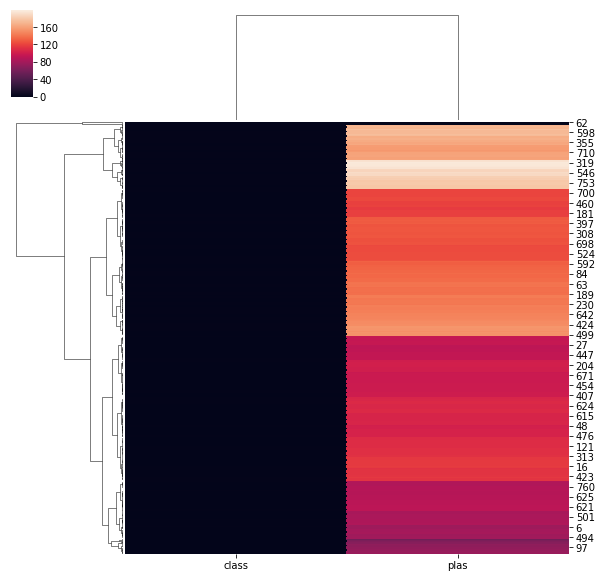

In [22]:
# Clustermap
#sns.clustermap(dados)
sns.clustermap(dados.loc[:,['class','plas']])

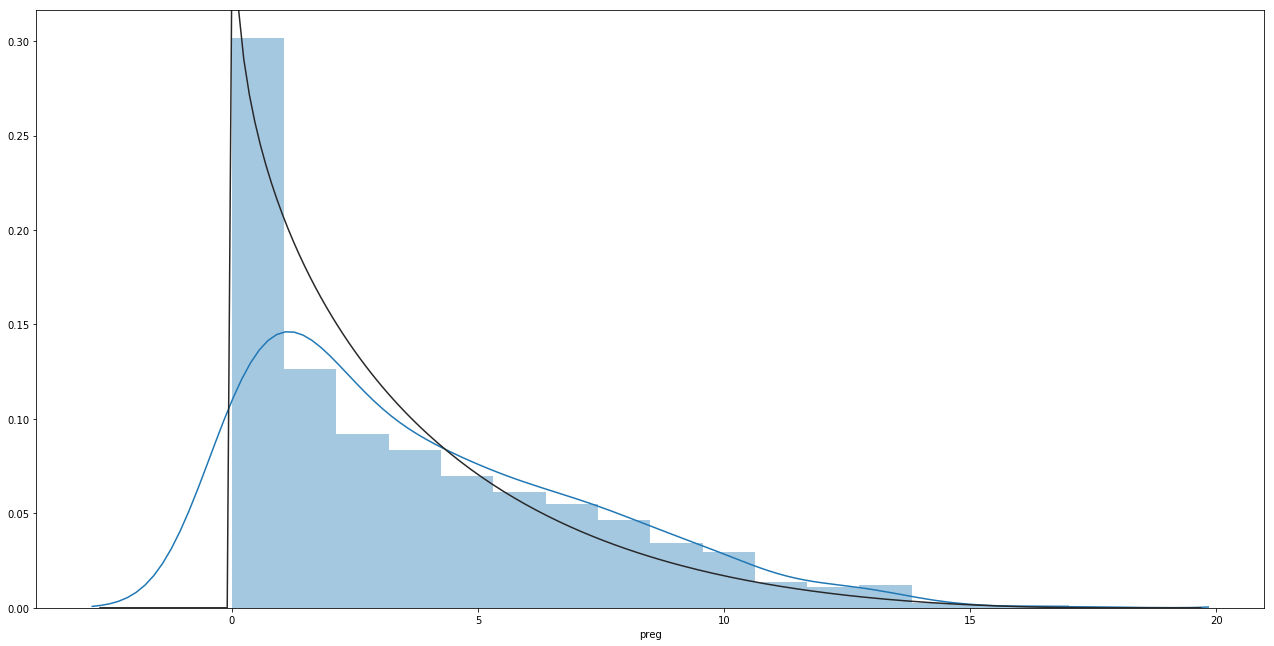

In [23]:
# Visualizando distribuicao com o seaborn
from scipy import stats
sns.distplot(dados.preg, fit = stats.gausshyper)

# Preparando os dados para Machine Learning
Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.

É muito provável que você tenha que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo.
O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. <br>
Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento.Mas é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

### Colocando os dados na mesma escala

Uma das primeiras tarefas dentro do pré-processamento é colocar seus dados na mesma escala. 
Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. <br>
Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com <b>range entre 0 e 1. </b><br>
Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. 
Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN.
O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [24]:
from sklearn.preprocessing import MinMaxScaler
array = dados.values

x = array[:, 0:8] #Aplicando apenas as variaveis preditoras
y = array[:8]

# Gerando nova escala
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(x)

# Sumarizando os dados transformados
print(rescaledX[0:5, :])

[[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


### Padronização
Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrões em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1. 
Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. 
Funciona bem quando os dados já estão na mesma escala. O scikit-learn possui uma função para esta etapa, chamada StandardScaler().

In [25]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

# Sumarizando os dados transformados
print(standardX[0:5,:])

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


### Normalização
No scikit-learn, normalização se refere a ajustar a escala de cada observação (linha) de modo que ela tenha comprimento igual a 1 (chamado vetor de comprimento 1 em álgebra linear). <br>Este método de pré-processamento é útil quando temos datasets esparsos (com muitos zeros) e atributos com escala muito variada. Útil quando usamos algoritmos de redes neurais ou que usam medida de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada Normalizer().

In [26]:
# Normalização dos dados

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import Normalizer
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando o novo padrão
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Sumarizando os dados transformados
print(normalizedX[0:5,:])

[[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


### Binarizing
Nós podemos definir um valor em nossos dados, ao qual chamamos de threshold e então definimos que todos os valores acima do threshold serão marcados como sendo 1 e todos valores iguais ou abaixo do threshold serão marcados como sendo 0. Isso é o que chamamos de Binarizing. Isso é útil quando temos probabilidades e queremos transformar os dados em algo com mais significado. O scikit-learn possui uma função para esta etapa, chamada Binarizer().

In [27]:
# Binarização dos dados

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import Binarizer
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando o novo padrão
scaler = Binarizer().fit(X)
binarizedX = scaler.transform(X)

# Sumarizando os dados transformados
print(binarizedX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Feature Selection - Exemplos de métodos para seleção de variáveis preditoras

Os atributos presentes no seu dataset e que você utiliza nos dados de treino, terão grande influência na precisão e resultado do seu modelo preditivo. <br>
Atributos irrelevante terão impacto negativo na performance, enquanto atributos colineares podem afetar o grau de acurácia do modelo. O Scikit-learn possui funções que automatizam o trabalhao de extração e seleção de variáveis.

### Com seleção Univariada
Testes estatísticos podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que estamos tentando prever. <br>
O Scikit-learn fornece a função SelectKBest() que pode ser usada com diversos testes estatísticos, para selecionar os atributos. <br>
Vamos usar um teste que estudamos no capítulo anterior, o teste qui-quadrado. Vamos selecionar os 4 melhores atributos que podem ser usados como variáveis preditoras.

In [28]:
# Extração de Variáveis com Testes Estatísticos Univariados (Teste qui-quadrado)

# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Extração de Variáveis
test = SelectKBest(score_func = chi2, k = 4)
featureKBest = test.fit(X, Y)

# Sumarizando o score
dfBest = DataFrame(data = featureKBest.scores_).T
dfBest.columns = dados.columns[0:8]
print(dfBest.T)

features = featureKBest.transform(X)

# Sumarizando atributos selecionados
print(features[0:5,:])

                0
preg   111.519691
plas  1411.887041
pres    17.605373
skin    53.108040
test  2175.565273
mass   127.669343
pedi     5.392682
age    181.303689
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


### Com eliminação Recursiva de Atributos
Esta é outra técnica para seleção de atributos, que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. <br>
Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo. Em inglês esta técnia é chamada Recursive Feature Elimination (RFE).<br>
O exemplo abaixo utiliza a técnica de eliminação recursiva de atributos com um algoritmo de Regressão Logística para selecionar as 3 melhores variáveis preditoras.<br>
O RFE selecionou as variáveis <b>preg, mass e pedi, que estão marcadas como True em "Atributos Selecionados"</b> e com valor 1 em "Ranking dos Atributos".

In [29]:
# Eliminação Recursiva de Variáveis

# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 3)
featureRFE = rfe.fit(X, Y)

# Print dos resultados
print("Número de Atributos: %d" % featureRFE.n_features_)
print(dados.columns[0:8])
print("Atributos Selecionados: %s" % featureRFE.support_)
print("Ranking dos Atributos: %s" % featureRFE.ranking_)

Número de Atributos: 3
Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
Atributos Selecionados: [ True False False False False  True  True False]
Ranking dos Atributos: [1 2 3 5 6 1 1 4]


### Com o metodo Ensamble
Bagged Decision Trees, como o algoritmo RandomForest, podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo.<br>
Quanto maior o score, maior a importância do atributo.

In [30]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier


array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do Modelo - Feature Selection
featureEnsamble = ExtraTreesClassifier()
featureEnsamble.fit(X, Y)

# Print dos Resultados
print(df.columns[0:8])
print(featureEnsamble.feature_importances_)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS'], dtype='object')
[0.11691154 0.24528426 0.0899962  0.07507324 0.07039807 0.14555897
 0.11662834 0.14014938]


### Comparando features

In [31]:
df1 = DataFrame(featureKBest.scores_)
df2 = DataFrame(featureRFE.support_)
df3 = DataFrame(featureEnsamble.feature_importances_)

dfFinal = df1.copy()
dfFinal.columns = ["KBest"]
dfFinal["RFE"] = df2.copy()
dfFinal["Ensamble"] = df3.copy()

dfFinal.index = dados.columns[0:8]
dfFinal
#dfFinal.sort_values(by=["KBest"])


,KBest,RFE,Ensamble
preg,111.519691,True,0.116912
plas,1411.887041,False,0.245284
pres,17.605373,False,0.089996
skin,53.108040,False,0.075073
test,2175.565273,False,0.070398
mass,127.669343,True,0.145559
pedi,5.392682,True,0.116628
age,181.303689,False,0.140149


# Feature extraction

## Principal Component Analysis (PCA)


O PCA foi inventado em 1901 por Karl Pearson e utiliza álgebra linear para transformar datasets em uma forma comprimida, o que é geralmente conhecido como Redução de Dimensionalidade. Com PCA você pode escolher o número de dimensões (chamados componentes principais) no resultado transformado. Vamos usar PCA para selecionar 3 componentes principais.

A Análise de Componentes Principais (PCA) é um método para extração das variáveis importantes (na forma de componentes) a partir de um grande conjunto de variáveis, disponíveis em um conjunto de dados. Esta técnica permite extrair um número pequenos de conjuntos dimensionais a partir de um dataset altamente dimensional. Com menos variáveis a visualização também se torna muito mais significativa. PCA é mais útil quando se lida com 3 ou mais dimensões.

<b>O PCA precisa ser alimentado com dados normalizados. Utilizar o PCA em dados não normalizados pode gerar resultados inesperados.</b>

A análise de componentes principais é uma técnica da estatística multivariada que <b>consiste em transformar um conjunto de variáveis originais em outro conjunto de variáveis denominadas de componentes principais. </b> Os componentes principais apresentam propriedades importantes: cada componente principal é uma combinação linear de todas as variáveis originais, são independentes entre si e estimados com o propósito de reter, em ordem de estimação, o máximo de informação, em termos da variação total contida nos dados. Os componentes principais são garantidamente independentes apenas se os dados forem normalmente distribuídos (conjuntamente).

Procura-se redistribuir a variação observada nos eixos originais de forma a se obter um conjunto de eixos ortogonais não correlacionados. Esta técnica pode ser utilizada para geração de índices e agrupamento de indivíduos. A análise agrupa os indivíduos de acordo com sua variação, isto é, os indivíduos são agrupados segundo suas variâncias, ou seja, segundo seu comportamento dentro da população, representado pela variação do conjunto de características que define o indivíduo, ou seja, a técnica agrupa os indivíduos de uma população segundo a variação de suas características.

A análise de componentes principais é associada à idéia de redução de massa de dados, com menor perda possível da informação. 

O objetivo é sumarizar os dados que contém muitas variáveis (p) por um conjunto menor de variáveis (k) compostas derivadas a partir do conjunto original. PCA usa uma conjunto de dados representado por uma matriz de n registros por p atributos, que podem estar correlacionados, e sumariza esse conjunto por eixos não correlacionados (componentes principais) que são uma combinação linear das p variáveis originais. As primeiras k componentes contém a maior quantidade de variação dos dados.

Em termos gerais a PCA busca reduzir o número de dimensões de um dataset, projetando os dados em um novo plano. Usando essa nova projeção os dados originais, que podem envolver diversas variáveis, podem ser interpretados utilizando menos "dimensões."

No dataset reduzido podemos observar com mais clareza tendências, padrões e/ou outliers. Mas vale lembrar que a regra: "Se não está nos dados brutos não existe!" é sempre válida. A PCA fornece apenas mais clareza aos padrões que já estão lá.

In [32]:
# Feature Extraction

# Import dos módulos
from pandas import read_csv
from sklearn.decomposition import PCA

# Carregando os dados
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Seleção de atributos
pca = PCA(n_components = 3)
fit = pca.fit(X)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.88854663 0.06159078 0.02579012]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


# Resampling

Você precisa saber se seu modelo preditivo vai funcionar bem quando receber novos dados. A melhor maneira de avaliar a performance do modelo é fazer previsões em dados que você já conhece o resultado. Outra maneira de testar a performance do seu modelo é utilizar técnicas estatísticas como métodos de amostragem que permitem você estimar quão bem seu modelo irá fazer previsões em novos dados.
A avaliação do modelo é uma estimativa de quão bem o algoritmo será capaz de prever em novos dados. Isso não garante performance. Após avaliar o modelo, nós podemos treiná-lo novamente com os dados de treino e então prepará-lo para uso operacional em produção. Existem diversas técnicas para isso e estudaremos duas aqui: Conjunto de dados de treino e de teste e Cross Validation.
    
### Com dados de Treino e de Teste

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).
Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [33]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criação do modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Score
result = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))

Acurácia: 75.591%


### Com Cross Validation

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão. O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [34]:
# Avaliação usando Cross Validation

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para os folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia: %.3f%% (%.3f%%)" % (resultado.mean()*100.0, resultado.std() * 100.0))

Acurácia: 77.086% (5.091%)


# Avaliando a performance
As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.<br>
Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. A função cross_validation.cross_val_score() será usada para avaliar a performance.

### Métricas para Algoritmos de Classificação

In [35]:
# Acurácia
# Número de previsões corretas. É útil apenas quando existe o mesmo número de observações em cada classe.

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Acurácia: 0.771 (0.051)


In [36]:
# Curva ROC 
# A Curva ROC permite analisar a métrica AUC (Area Under the Curve).
# Essa é uma métrica de performance para classificação binária, em que podemos definir as classes em positiavs e negativas.
# Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity.
# Sensitivity é a taxa de verdadeiros positivos (TP). Ese é o número de instâncias positivas da primeira classe que foram previstas corretamente.
# Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da segunda classe que foram previstas corretamente.
# Valores acima de 0.5 indicam uma boa taxa de previsão.

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = LogisticRegression()
resultado = model_selection.cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

AUC: 0.826 (0.050)


In [37]:
# Confusion Matrix
# Permite verificar a acurácia de um modelo com duas classes

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[141  21]
 [ 41  51]]


In [38]:
# Logarithmic Loss
# Avalia as previsões de probabilidade de um membro pertencer a uma determinada classe. 
# Valores menores indicam boa performance, com 0 representando um perfeito logloss. A função cross_val_score() inverte o valor.

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'neg_log_loss')

# Print do resultado
print("Logloss: %.3f (%.3f)" % (resultado.mean(), resultado.std()))

Logloss: -0.494 (0.042)


In [39]:
# Relatório de Classificação

# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

             precision    recall  f1-score   support

        0.0       0.77      0.87      0.82       162
        1.0       0.71      0.55      0.62        92

avg / total       0.75      0.76      0.75       254



# Algoritmos de Classificação

O processo para uso dos algoritmos com sklearn é o mesmo entre todos
1. Prepara dados: Não realizado abaixo, porém exemplificado anteriormente
2. Divide entre treino e teste: Neste caso, usando o KFolds
3. Aplica algoritmos: Usando o cross_validation.cross_val_score

## Lista de algoritmos

#### Regressão Logística
Algoritmo Linear. O algoritmo de Regressão Logística assume que seus dados estão em uma Distribuição Normal para valores numéricos que podem ser modelados com classificação binária.

#### Linear Discriminant Analysis - LDA
Algoritmo Linear. Técnica estatística para classificação binária. Também assume que os dados estão em Distribuição Normal.

#### Gausian NB
Algoritmo Não-Linear que utiliza uma métrica de distância para encontrar o valor de K mais adequado as instâncias do dataset de treino.


#### KNeighbosClassifier
Algoritmo Não-Linear. Calcula a Probabilidade de cada classe e a probabilidade condicional de cada classe dado uma variável de entrada. As probabilidades são então estimadas para os novos dados e multiplicadas, assumindo que são independentes (suposição simples ou Naive). Assume dados em distirbuição Gaussiana (Normal)


#### CART
Algoritmo Não-Linear. O algoritmo CART constrói uma árvore binária a partir do dataset de treino. Cada atributo e cada valor de cada atributo são avaliados com o objetivo de reduzir a função de custo (Cost Function).
O objetivo deste modelo é buscar uma linha que melhor separa duas classes dentro de um conjunto de dados. As instâncias de dados que estão mais próximas desta linha que separa as classes, são chamadas support vectors. O 
SVM tem sido estendido para suportar multiclasses.

#### SVM
Support Vector Machines são algoritmos de classificação muito poderosos. Quando usados em conjunto com “Random forest” e outras ferramentas de aprendizagem automática, dão uma dimensão muito diferente para montagem de modelos. Assim, eles se tornam cruciais para os casos em que é necessária um poder de previsão muito elevado. Esses algoritmos são um pouco mais difíceis de visualizar devido à complexidade na formulação.




Z:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
NB: 0.755178 (0.042766)
KNN: 0.726555 (0.061821)
CART: 0.700478 (0.060396)
SVM: 0.651025 (0.072141)


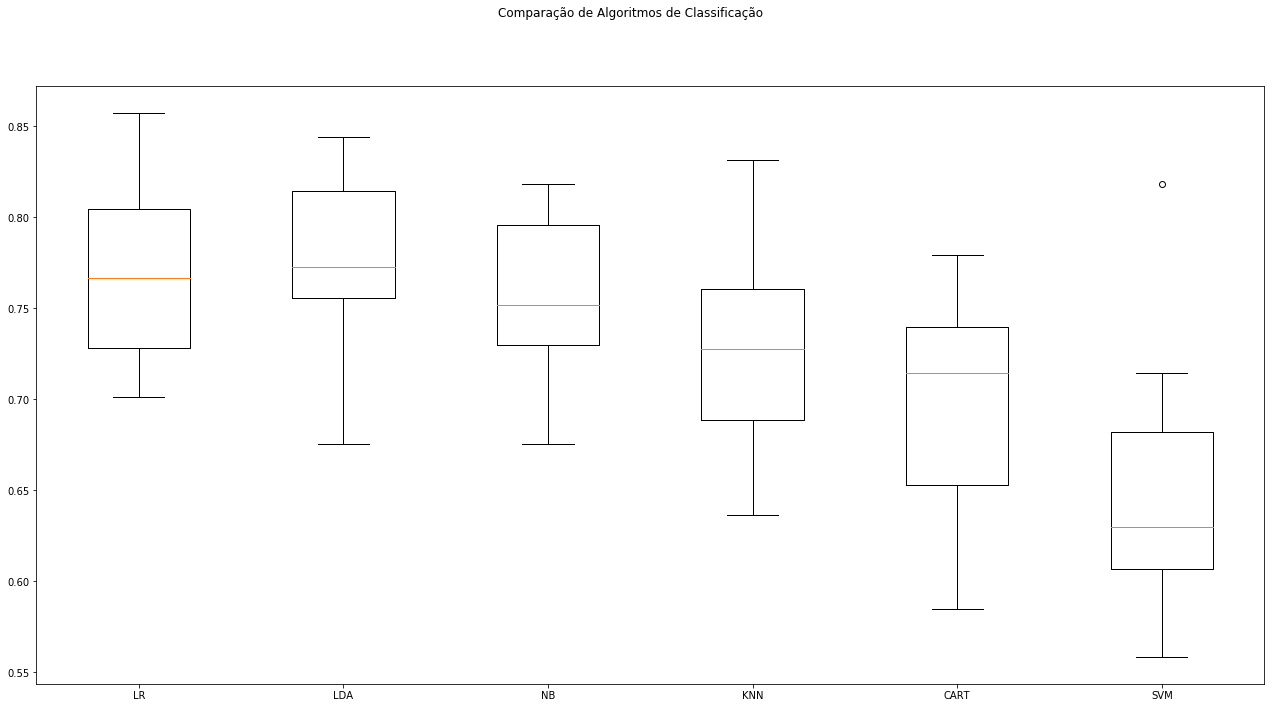

In [40]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/pima-data.csv"
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv(url, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Preparando os modelo
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_results = cross_validation.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

# Algoritmos de Regressão

#### Regressão Linear

#### Ridge Regression

#### Lasso Regression

#### ElasticNet Regression

#### KNN (KNeighbors classifier)

#### CART

#### SVM

LR: 0.202529 (0.595296)
RDG: 0.256167 (0.521195)
LASSO: 0.198290 (0.333559)
ELANET: 0.227749 (0.354803)
KNN: -4.949261 (12.560683)
DTree: -0.059629 (0.978358)
SVR: -1.005020 (1.083806)


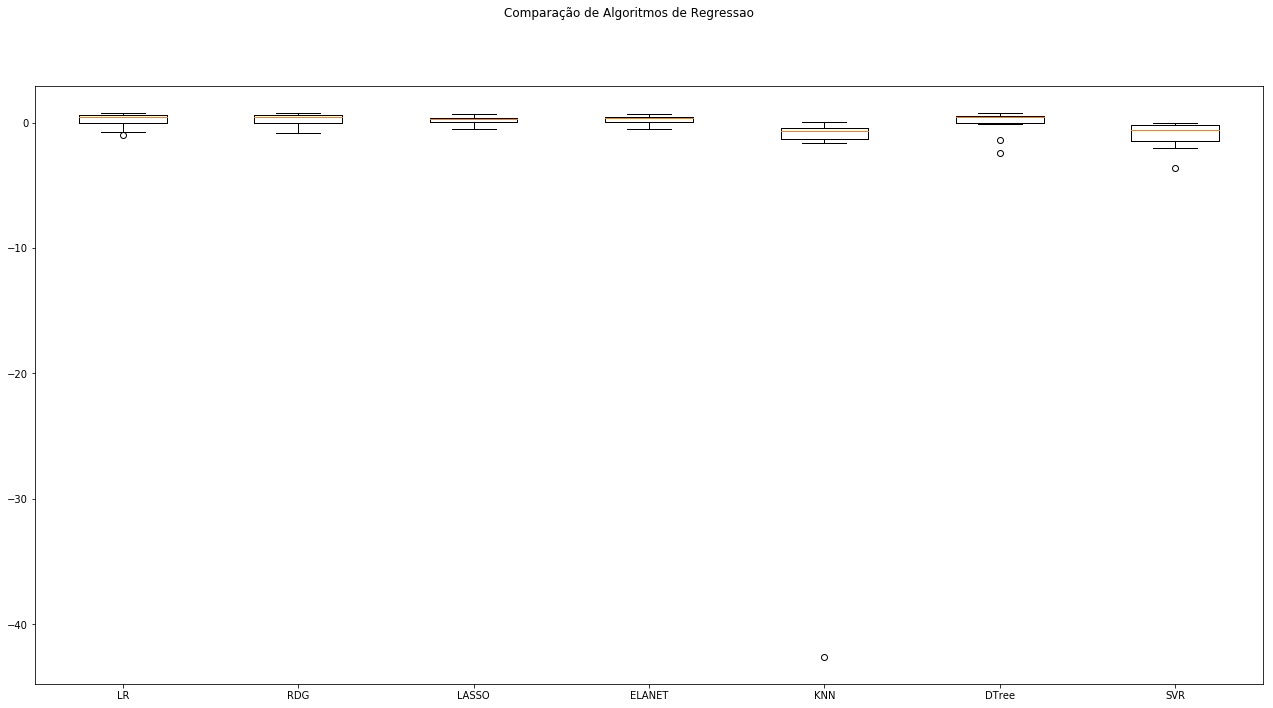

In [41]:
# Import dos módulos
from pandas import read_csv
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


# Carregando os dados
url = "http://datascienceacademy.com.br/blog/aluno/Python-Spark/Datasets/boston-houses.csv"
colunas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT', 'MEDV']
df = read_csv(url, delim_whitespace = True, names = colunas)
array = df.values

# Separando o array em componentes de input e output
X = array[:,0:13]
Y = array[:,13]

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Preparando os modelo
modelos = []
modelos.append(('LR', LinearRegression()))
modelos.append(('RDG', Ridge()))
modelos.append(('LASSO', Lasso()))
modelos.append(('ELANET', ElasticNet()))
modelos.append(('KNN', KNeighborsRegressor()))
modelos.append(('DTree', DecisionTreeRegressor()))
modelos.append(('SVR', SVR()))
                

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_results = cross_validation.cross_val_score(modelo, X, Y, cv = kfold, scoring = 'r2')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Regressao')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

#resultados
#resultados[2]